<a href="https://colab.research.google.com/github/yussouf88/Deep_learning/blob/main/DL_file_upto_data1_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#Final
import torch
import torch.nn as nn
import torch.nn.functional as f
import pandas as pd
from sklearn.model_selection import train_test_split
pd.set_option('future.no_silent_downcasting', True)

import matplotlib.pyplot as plt


In [68]:
class Model(nn.Module):
  def __init__(self,ip = 4,h1 =108,h2=9,h3=10,op=3):
    super().__init__()
    self.fc1 = nn.Linear(ip,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.fc4 = nn.Linear(h3,op)

  def forword(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = f.relu(self.fc3(x))
    x = self.fc4(x)

    return x

torch.manual_seed(41)
model = Model()



In [69]:
#Data Import
ur1 = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(ur1)
df['variety'] = df.species.replace(['setosa', 'versicolor', 'virginica'],[0,1,2])
x = df[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']]
y = df['variety']
x = x.values
y = y.values
y = pd.to_numeric(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=41)
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_train)


In [70]:
critereon = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=.01)
epoch = 100
lss = []

for i in range(epoch):
  y_pred = model.forword(x_train)
  loss = critereon(y_pred,y_train)
  lss.append(loss.detach().numpy())
  if i%10==0:
    print(f'for i = {i} loss = {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


for i = 0 loss = 1.1354827880859375
for i = 10 loss = 0.6025761961936951
for i = 20 loss = 0.33008208870887756
for i = 30 loss = 0.1686202436685562
for i = 40 loss = 0.06579546630382538
for i = 50 loss = 0.036293234676122665
for i = 60 loss = 0.029025258496403694
for i = 70 loss = 0.024656925350427628
for i = 80 loss = 0.0212335754185915
for i = 90 loss = 0.019539058208465576


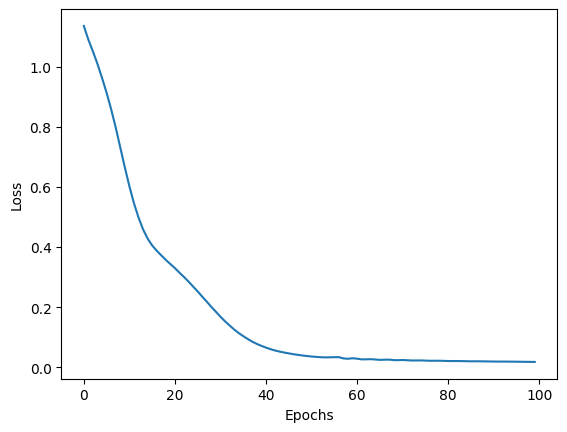

In [73]:
plt.plot(range(epoch),lss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()